In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from src.MLP import MLP

In [7]:
path = os.getcwd()
file = '/data/ML-CUP22-TR.csv'

labels = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']

TR = pd.read_csv(path + file, sep = ',', header = None, usecols=range(1,12), \
                 names = labels, skiprows = 7)

TR = TR.to_numpy()

np.random.shuffle(TR)

TR = np.split(TR, [9], axis = 1)

X = TR[0]
y_true = TR[1]

print(y_true)
print(X.shape)
print(y_true.shape)

[[ 21.503352 -27.963854]
 [  5.538895 -26.394722]
 [ 14.032216 -30.029783]
 ...
 [ 17.944705 -28.729693]
 [  4.200574 -21.861   ]
 [ 12.015829 -30.834926]]
(1492, 9)
(1492, 2)


In [8]:
mlp = MLP([5, 5], 9, 2, "sigm")
n_epochs = 500

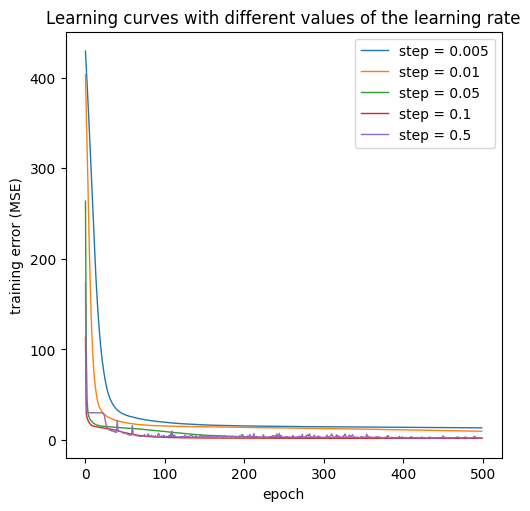

In [20]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

for step in [0.005, 0.01, 0.05, 0.1]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 50, step = step)
    ax.plot(range(n_epochs), learning_curve, label = 'step = ' + str(step), linewidth = 1)

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')  
ax.set_title("Learning curves with different values of the learning rate")  
ax.legend()

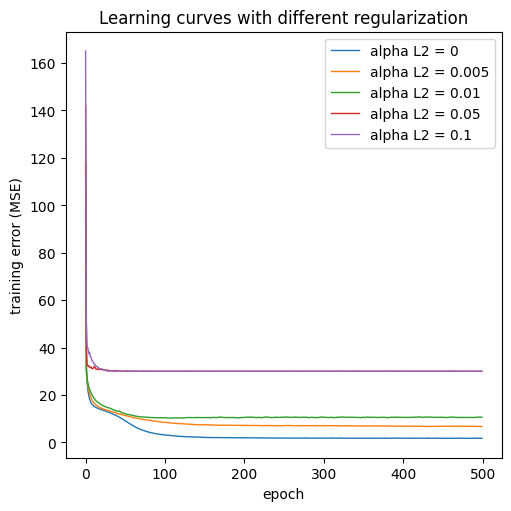

In [10]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.1
for alpha_l2 in [0, 0.005, 0.01, 0.05, 0.1]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 50, step = step, regularization = "L2", alpha_l2 = alpha_l2)
    ax.plot(range(n_epochs), learning_curve, label = 'alpha L2 = ' + str(alpha_l2), linewidth = 1)

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')  
ax.set_title("Learning curves with different regularization")  
ax.legend()

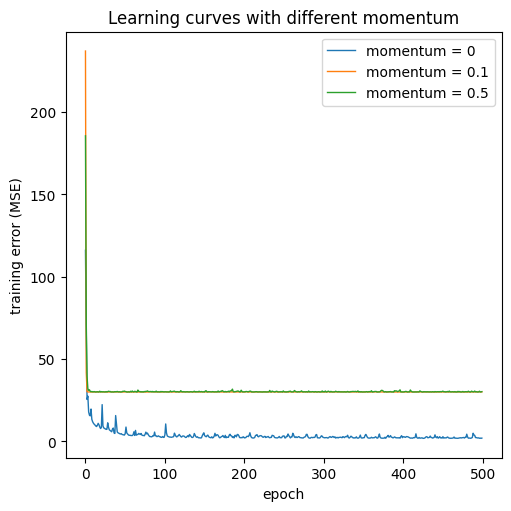

In [17]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.5
for momentum in [0, 0.1, 0.5]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 50, step = step, momentum = momentum)
    ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')   
ax.set_title("Learning curves with different momentum")  
ax.legend()

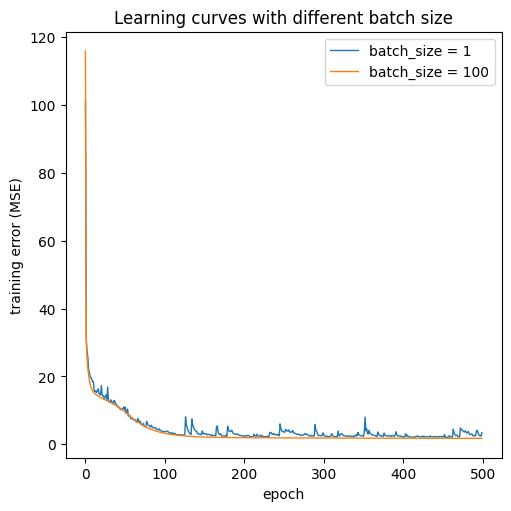

In [12]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.1
for batch_size in [1, 100]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = batch_size, step = step)
    ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'batch_size = ' + str(batch_size))

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')   
ax.set_title("Learning curves with different batch size")  
ax.legend()

In [22]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.3

momentum = 0
learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 50, step = step)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

momentum = 0.3
learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 50, step = step, momentum = 0)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 50, step = step, momentum = 0)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum) + ' (Nesterov)')

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')    
ax.legend()